In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
siq = pd.read_csv(
    "/Users/carterwebb/Desktop/siq.csv"
)

In [57]:
siq_red = siq_subset[
    (siq_subset["Survey Year"] >= 2020) & (siq_subset["Survey Year"] <= 2024)
][
    [
        "Bed Name",
        "Survey Date",
        "Survey Month",
        "Survey Year",
        "Acres",
        "Temp1 Shore Edge"
    ]
].copy()

In [58]:
siq_red

,Bed Name,Survey Date,Survey Month,Survey Year,Acres,Temp1 Shore Edge
306,Clallam Bay,2020-07-23,7,2020,13.136316,NaN
307,Freshwater Bay 1,2020-08-19,8,2020,112.665764,12.2
308,Freshwater Bay 2,2020-08-19,8,2020,0.635944,11.1
309,Ebey's Landing,2020-06-18,6,2020,17.910271,11.8
310,Ebey's Landing,2020-06-18,6,2020,16.765066,11.8
...,...,...,...,...,...,...
534,Aiston Preserve,2024-07-21,7,2024,0.343985,14.4
535,Aiston Preserve,2024-07-21,7,2024,0.421390,14.4
536,Cherry Point-Gulf Rd,2024-08-04,8,2024,21.036723,13.9
537,Cherry Point-Gulf Rd,2024-09-01,9,2024,24.558852,12.8


In [60]:
ebey_siq = siq_red[siq_red["Bed Name"] == "Ebey's Landing"]

In [61]:
ebey_siq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 309 to 489
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bed Name          9 non-null      object 
 1   Survey Date       9 non-null      object 
 2   Survey Month      9 non-null      int64  
 3   Survey Year       9 non-null      int64  
 4   Acres             9 non-null      float64
 5   Temp1 Shore Edge  9 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 504.0+ bytes


In [62]:
ebey_siq["Temp1 Shore Edge"] = pd.to_numeric(ebey_siq["Temp1 Shore Edge"], errors="coerce")

/var/folders/7s/t5l3pg4j2j54njys9zrdzdxr0000gn/T/ipykernel_4617/3839826711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebey_siq["Temp1 Shore Edge"] = pd.to_numeric(ebey_siq["Temp1 Shore Edge"], errors="coerce")


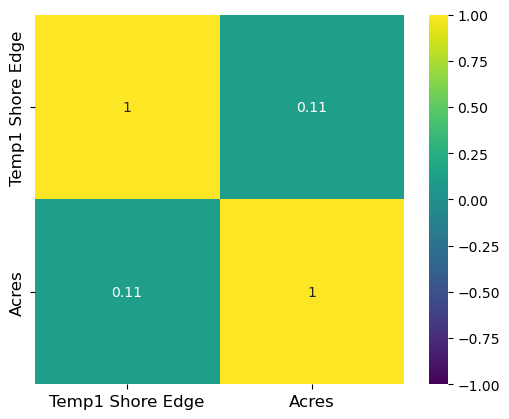

In [64]:
predictor_variables = ['Temp1 Shore Edge']

numerical_predictors = ebey_siq[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey_siq[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

In [69]:
poss_siq = siq_red[siq_red["Bed Name"] == "Possession Point"]

In [73]:
poss_siq["Temp1 Shore Edge"] = pd.to_numeric(poss_siq["Temp1 Shore Edge"], errors="coerce")

/var/folders/7s/t5l3pg4j2j54njys9zrdzdxr0000gn/T/ipykernel_4617/851862591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poss_siq["Temp1 Shore Edge"] = pd.to_numeric(poss_siq["Temp1 Shore Edge"], errors="coerce")


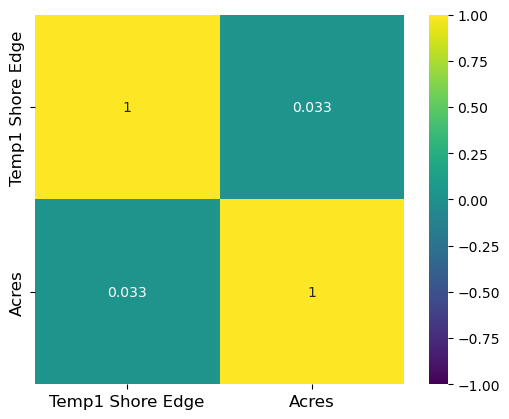

In [74]:
predictor_variables = ['Temp1 Shore Edge']

numerical_predictors = poss_siq[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = poss_siq[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

In [71]:
poss_siq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 319 to 502
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bed Name          18 non-null     object 
 1   Survey Date       18 non-null     object 
 2   Survey Month      18 non-null     int64  
 3   Survey Year       18 non-null     int64  
 4   Acres             18 non-null     float64
 5   Temp1 Shore Edge  17 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1008.0+ bytes


In [76]:
poss_siq = poss_siq.rename(columns=lambda x: x.strip().replace(" ", "_"))

In [77]:
poss_siq = poss_siq.sort_values("Survey_Year")


poss_siq["Temp1_Shore_Edge"] = pd.to_numeric(poss_siq["Temp1_Shore_Edge"], errors="coerce")


poss_siq["Temp_prev_year"] = poss_siq["Temp1_Shore_Edge"].shift(1)

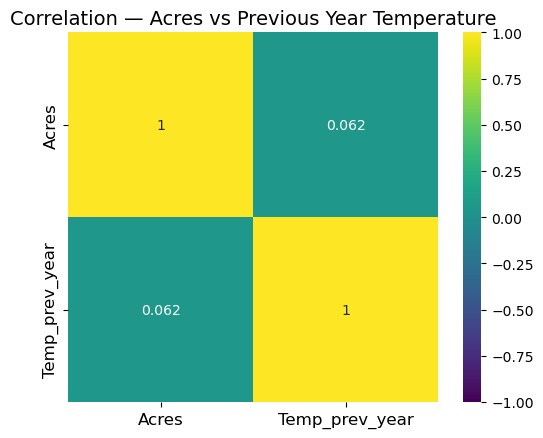

In [78]:
corr_matrix = poss_siq[["Acres", "Temp_prev_year"]].corr()

sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, square=True, annot=True, cmap="viridis"
)
plt.title("Correlation — Acres vs Previous Year Temperature", fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [79]:
poss_siq["Temp_prev2"] = poss_siq["Temp1_Shore_Edge"].shift(2)

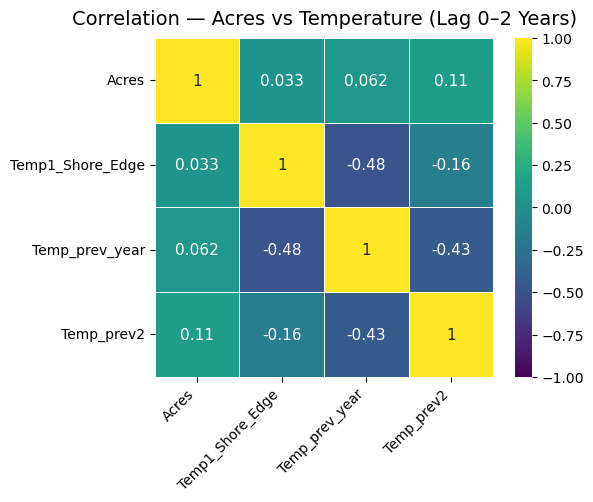

In [81]:
corr_compare = poss_siq[["Acres", "Temp1_Shore_Edge", "Temp_prev_year", "Temp_prev2"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_compare,
    vmin=-1, vmax=1, square=True, annot=True, cmap="viridis",
    linewidths=0.5, annot_kws={"size": 11}
)

plt.title("Correlation — Acres vs Temperature (Lag 0–2 Years)", fontsize=14, pad=10)


plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)   # keep y labels horizontal (cleaner), or use 45 for diagonal both

plt.tight_layout()
plt.show()

In [82]:
poss_siq = poss_siq.sort_values("Survey_Year")


poss_siq["Acres_pct_change"] = poss_siq["Acres"].pct_change() * 100

In [85]:
corr_compare = poss_siq[
    ["Acres","Acres_pct_change", "Temp1_Shore_Edge", "Temp_prev_year", "Temp_prev2"]
].corr()

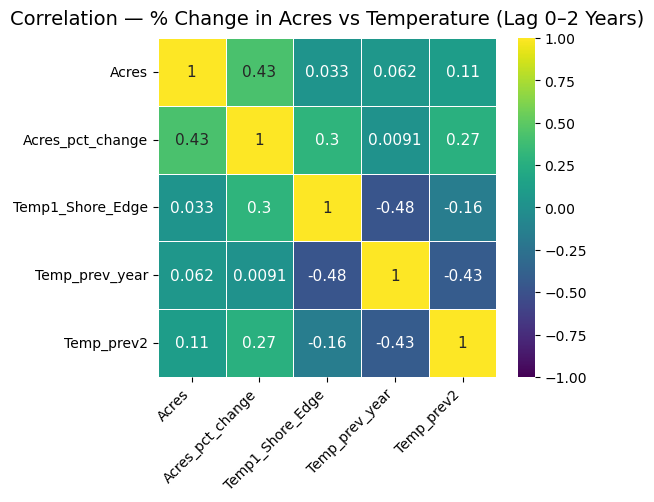

In [86]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_compare,
    vmin=-1, vmax=1, square=True, annot=True, cmap="viridis",
    linewidths=0.5, annot_kws={"size": 11}
)

plt.title("Correlation — % Change in Acres vs Temperature (Lag 0–2 Years)",
          fontsize=14, pad=10)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [88]:
siq_ch = siq_red.sort_values("Survey Year")

# Calculate percent change in Acres from previous year
poss_siq["Acres_pct_change"] = poss_siq["Acres"].pct_change() * 100

In [92]:

siq_red = siq_red.sort_values(["Bed Name", "Survey Year"])
siq_red["Acres"] = pd.to_numeric(siq_red["Acres"], errors="coerce")
siq_red["Temp1 Shore Edge"] = pd.to_numeric(siq_red["Temp1 Shore Edge"], errors="coerce")


siq_red["Acres_pct_change"] = (
    siq_red.groupby("Bed Name")["Acres"].pct_change() * 100
)


for lag in range(1, 5): 
    siq_red[f"Temp_prev{lag}"] = (
        siq_red.groupby("Bed Name")["Temp1 Shore Edge"].shift(lag)
    )

In [95]:
corr_all = siq_red[
    ["Acres","Acres_pct_change", "Temp1 Shore Edge", "Temp_prev1", "Temp_prev2", "Temp_prev3", "Temp_prev4"]
].corr()

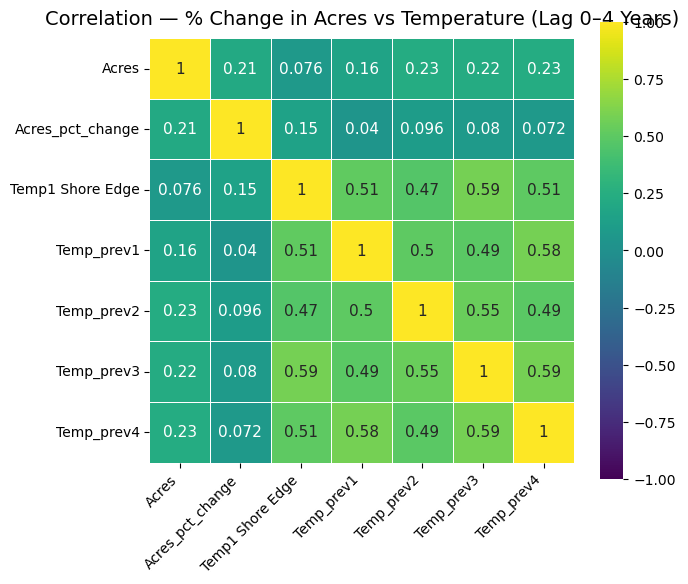

In [96]:
plt.figure(figsize=(7, 6))
sns.heatmap(
    corr_all,
    vmin=-1, vmax=1, square=True, annot=True, cmap="viridis",
    linewidths=0.5, annot_kws={"size": 11}
)

plt.title("Correlation — % Change in Acres vs Temperature (Lag 0–4 Years)",
          fontsize=14, pad=10)


plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()